# Personal Finance Insights
In this project,we will delve into my financial behavior and spending patterns by analyzing my bank statement data. Through this analysis, we seek to gain insights into how I utilize my funds and manage my expenses over a specified period (**March 2023-March 2024**). This exploration involves examining various aspects such as income, recurring expenses, monthly expenditure trends, and the overall financial balance. Additionally, we'll visualize these insights using interactive charts and summary statistics to provide a comprehensive overview of my financial activities. This project not only offers a glimpse into my financial habits but also serves as a tool for personal financial management and decision-making.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

In [2]:
df = pd.read_csv('accountactivity.csv')


In [3]:
df

,03/01/2023,AMZN Mktp CA _V,24.85,Unnamed: 3,2502.24
0,03/01/2023,AMZN Mktp CA _V,22.59,NaN,2479.65
1,03/01/2023,SSV TO: 31406419134,0.50,NaN,2479.15
2,03/01/2023,IC* INST REV 02/27_V,NaN,155.00,2634.15
3,03/01/2023,IC* INSTACART _V,117.45,NaN,2516.70
4,03/01/2023,EQ BANK FTD,1705.86,NaN,810.84
...,...,...,...,...,...
321,03/13/2024,Sage Living Man MSP,3002.00,NaN,1724.49
322,03/15/2024,E-TRANSFER ***fgP,NaN,24.00,1748.49
323,03/15/2024,SEND E-TFR ***4xh,24.00,NaN,1724.49
324,03/15/2024,JY375 TFR-TO 6419134,1500.00,NaN,224.49


In [4]:
df.columns = ['Date', 'Description', 'Debit', 'Credit', 'Balance']
df

,Date,Description,Debit,Credit,Balance
0,03/01/2023,AMZN Mktp CA _V,22.59,NaN,2479.65
1,03/01/2023,SSV TO: 31406419134,0.50,NaN,2479.15
2,03/01/2023,IC* INST REV 02/27_V,NaN,155.00,2634.15
3,03/01/2023,IC* INSTACART _V,117.45,NaN,2516.70
4,03/01/2023,EQ BANK FTD,1705.86,NaN,810.84
...,...,...,...,...,...
321,03/13/2024,Sage Living Man MSP,3002.00,NaN,1724.49
322,03/15/2024,E-TRANSFER ***fgP,NaN,24.00,1748.49
323,03/15/2024,SEND E-TFR ***4xh,24.00,NaN,1724.49
324,03/15/2024,JY375 TFR-TO 6419134,1500.00,NaN,224.49


In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df

,Date,Description,Debit,Credit,Balance
0,2023-03-01,AMZN Mktp CA _V,22.59,NaN,2479.65
1,2023-03-01,SSV TO: 31406419134,0.50,NaN,2479.15
2,2023-03-01,IC* INST REV 02/27_V,NaN,155.00,2634.15
3,2023-03-01,IC* INSTACART _V,117.45,NaN,2516.70
4,2023-03-01,EQ BANK FTD,1705.86,NaN,810.84
...,...,...,...,...,...
321,2024-03-13,Sage Living Man MSP,3002.00,NaN,1724.49
322,2024-03-15,E-TRANSFER ***fgP,NaN,24.00,1748.49
323,2024-03-15,SEND E-TFR ***4xh,24.00,NaN,1724.49
324,2024-03-15,JY375 TFR-TO 6419134,1500.00,NaN,224.49


In [6]:
# Fill missing values with 0
df = df.fillna(0)
df

,Date,Description,Debit,Credit,Balance
0,2023-03-01,AMZN Mktp CA _V,22.59,0.00,2479.65
1,2023-03-01,SSV TO: 31406419134,0.50,0.00,2479.15
2,2023-03-01,IC* INST REV 02/27_V,0.00,155.00,2634.15
3,2023-03-01,IC* INSTACART _V,117.45,0.00,2516.70
4,2023-03-01,EQ BANK FTD,1705.86,0.00,810.84
...,...,...,...,...,...
321,2024-03-13,Sage Living Man MSP,3002.00,0.00,1724.49
322,2024-03-15,E-TRANSFER ***fgP,0.00,24.00,1748.49
323,2024-03-15,SEND E-TFR ***4xh,24.00,0.00,1724.49
324,2024-03-15,JY375 TFR-TO 6419134,1500.00,0.00,224.49


In [7]:
# Create 'Transaction Type' column
df['Transaction Type'] = df.apply(lambda x: 'Debit' if x['Debit'] > 0 else 'Credit', axis=1)
df

,Date,Description,Debit,Credit,Balance,Transaction Type
0,2023-03-01,AMZN Mktp CA _V,22.59,0.00,2479.65,Debit
1,2023-03-01,SSV TO: 31406419134,0.50,0.00,2479.15,Debit
2,2023-03-01,IC* INST REV 02/27_V,0.00,155.00,2634.15,Credit
3,2023-03-01,IC* INSTACART _V,117.45,0.00,2516.70,Debit
4,2023-03-01,EQ BANK FTD,1705.86,0.00,810.84,Debit
...,...,...,...,...,...,...
321,2024-03-13,Sage Living Man MSP,3002.00,0.00,1724.49,Debit
322,2024-03-15,E-TRANSFER ***fgP,0.00,24.00,1748.49,Credit
323,2024-03-15,SEND E-TFR ***4xh,24.00,0.00,1724.49,Debit
324,2024-03-15,JY375 TFR-TO 6419134,1500.00,0.00,224.49,Debit


In [8]:
# Create 'Amount' column
df['Amount'] = df['Debit'] - df['Credit']
df

,Date,Description,Debit,Credit,Balance,Transaction Type,Amount
0,2023-03-01,AMZN Mktp CA _V,22.59,0.00,2479.65,Debit,22.59
1,2023-03-01,SSV TO: 31406419134,0.50,0.00,2479.15,Debit,0.50
2,2023-03-01,IC* INST REV 02/27_V,0.00,155.00,2634.15,Credit,-155.00
3,2023-03-01,IC* INSTACART _V,117.45,0.00,2516.70,Debit,117.45
4,2023-03-01,EQ BANK FTD,1705.86,0.00,810.84,Debit,1705.86
...,...,...,...,...,...,...,...
321,2024-03-13,Sage Living Man MSP,3002.00,0.00,1724.49,Debit,3002.00
322,2024-03-15,E-TRANSFER ***fgP,0.00,24.00,1748.49,Credit,-24.00
323,2024-03-15,SEND E-TFR ***4xh,24.00,0.00,1724.49,Debit,24.00
324,2024-03-15,JY375 TFR-TO 6419134,1500.00,0.00,224.49,Debit,1500.00


In [9]:
# Define function to categorize transactions
def categorize_transaction(description):
    if 'AMZN' in description:
        return 'Amazon'
    elif 'INSTACART' in description or 'FARM' in description or 'CHEFS' in description:
        return 'Grocery'
    elif 'IC* INST ' in description:
        return 'Grocery Hold Rev'
    elif 'EQ BANK' in description:
        return 'Bank Transfer'
    elif 'SSV' in description:
        return 'Account Interest'
    elif 'E-TRANSFER' in description:
        return 'Interac Received'
    elif 'PARAMOUNT' in description or 'CRUNCH' in description:
        return 'Subcriptions'
    elif 'SEPHORA'in description:
        return 'Sephora'
    elif 'STARBUCKS'in description:
        return 'Coffee'
    elif 'Sage'in description:
        return 'Rent'
    elif '13591182'in description:
        return 'SoS Pay'
    elif ' 6419134'in description:
        return 'Account Transfers'
    elif 'SEND E-TFR'in description:
        return 'Interac Sent'
    elif 'UBER'in description or 'METRO' in description:
        return 'Transportation'
    elif 'GRANT'in description:
        return 'GT Pay'
    else:
        return 'Shopping & Miscellanous'
# Apply categorization function to 'Description' column
df['Category'] = df['Description'].apply(categorize_transaction)
df

,Date,Description,Debit,Credit,Balance,Transaction Type,Amount,Category
0,2023-03-01,AMZN Mktp CA _V,22.59,0.00,2479.65,Debit,22.59,Amazon
1,2023-03-01,SSV TO: 31406419134,0.50,0.00,2479.15,Debit,0.50,Account Interest
2,2023-03-01,IC* INST REV 02/27_V,0.00,155.00,2634.15,Credit,-155.00,Grocery Hold Rev
3,2023-03-01,IC* INSTACART _V,117.45,0.00,2516.70,Debit,117.45,Grocery
4,2023-03-01,EQ BANK FTD,1705.86,0.00,810.84,Debit,1705.86,Bank Transfer
...,...,...,...,...,...,...,...,...
321,2024-03-13,Sage Living Man MSP,3002.00,0.00,1724.49,Debit,3002.00,Rent
322,2024-03-15,E-TRANSFER ***fgP,0.00,24.00,1748.49,Credit,-24.00,Interac Received
323,2024-03-15,SEND E-TFR ***4xh,24.00,0.00,1724.49,Debit,24.00,Interac Sent
324,2024-03-15,JY375 TFR-TO 6419134,1500.00,0.00,224.49,Debit,1500.00,Account Transfers


In [10]:

# Reorder columns
df = df[['Date', 'Description', 'Transaction Type', 'Amount', 'Category', 'Balance']]
df

,Date,Description,Transaction Type,Amount,Category,Balance
0,2023-03-01,AMZN Mktp CA _V,Debit,22.59,Amazon,2479.65
1,2023-03-01,SSV TO: 31406419134,Debit,0.50,Account Interest,2479.15
2,2023-03-01,IC* INST REV 02/27_V,Credit,-155.00,Grocery Hold Rev,2634.15
3,2023-03-01,IC* INSTACART _V,Debit,117.45,Grocery,2516.70
4,2023-03-01,EQ BANK FTD,Debit,1705.86,Bank Transfer,810.84
...,...,...,...,...,...,...
321,2024-03-13,Sage Living Man MSP,Debit,3002.00,Rent,1724.49
322,2024-03-15,E-TRANSFER ***fgP,Credit,-24.00,Interac Received,1748.49
323,2024-03-15,SEND E-TFR ***4xh,Debit,24.00,Interac Sent,1724.49
324,2024-03-15,JY375 TFR-TO 6419134,Debit,1500.00,Account Transfers,224.49


In [11]:
summary_stats = df[['Date', 'Description', 'Transaction Type', 'Amount', 'Category', 'Balance']].describe()
summary_stats

,Date,Amount,Balance
count,326,326.000000,326.000000
mean,2023-07-30 14:25:46.012269824,2.734693,1462.779969
min,2023-03-01 00:00:00,-12982.500000,-1316.230000
25%,2023-03-24 18:00:00,-23.352500,298.085000
50%,2023-06-12 00:00:00,5.615000,889.070000
75%,2023-12-24 18:00:00,44.220000,2329.685000
max,2024-03-15 00:00:00,12982.500000,13077.210000
std,NaN,1378.381945,1690.257540


In [12]:
# Visualizing transaction trends over time
time_trend = df.hvplot.line(x='Date', y='Amount', xlabel='Date', ylabel='Amount', title='Transaction Trends Over Time')
time_trend

:Curve   [Date]   (Amount)

<Axes: title={'center': 'Spending Categories'}, xlabel='Category'>

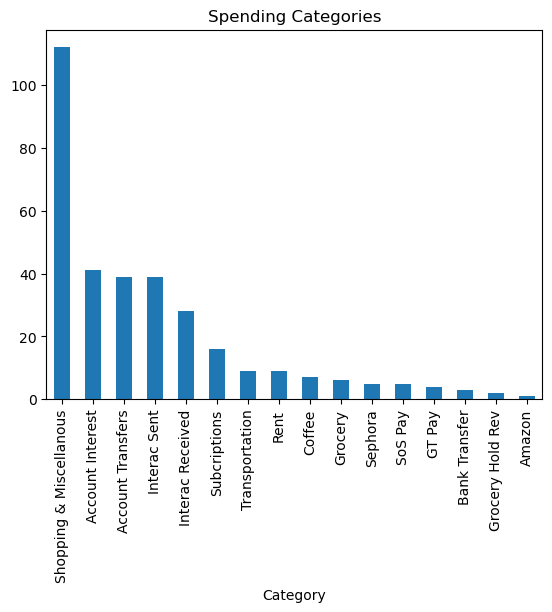

In [13]:
# Visualizing spending categories
category_plot = df['Category'].value_counts().plot(kind='bar', title='Spending Categories')
category_plot 

In [14]:
transaction_distribution = df.groupby(['Transaction Type', 'Category']).size().reset_index(name='Count')
transaction_distribution_plot = transaction_distribution.hvplot.bar(x='Category', y='Count', by='Transaction Type', stacked=True, title='Transaction Distribution',width=800, height=400)
transaction_distribution_plot.opts(xrotation=45)

:Bars   [Category,Transaction Type]   (Count)

In [15]:
#Analyze spending patterns by category. For example, total spending on groceries, online shopping, etc.
category_spending = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_spending


Category
Rent                       21804.00
Interac Sent               16143.37
Account Transfers           6305.56
Bank Transfer               4727.58
Grocery                      432.05
Subcriptions                 235.39
Transportation                71.44
Coffee                        51.92
Account Interest              38.00
Amazon                        22.59
Sephora                       11.30
Grocery Hold Rev            -225.00
SoS Pay                    -6931.20
GT Pay                     -7243.44
Interac Received          -10204.10
Shopping & Miscellanous   -24347.95
Name: Amount, dtype: float64

In [16]:
# 2. Data Cleaning
missing_values = df.isnull().sum()
missing_values

Date                0
Description         0
Transaction Type    0
Amount              0
Category            0
Balance             0
dtype: int64

In [17]:
# Time Series Analysis - Balance over time
balance_over_time = df.hvplot.line(x='Date', y='Balance', title='Balance Over Time', xlabel='Date', ylabel='Balance')
balance_over_time


:Curve   [Date]   (Balance)

In [18]:
# 5. Category Analysis
category_spending = df.groupby('Category')['Amount'].sum().sort_values().hvplot.bar(title='Total Spending by Category', xlabel='Category', ylabel='Amount',width=800, height=400)
category_spending.opts(xrotation=45)

:Bars   [Category]   (Amount)

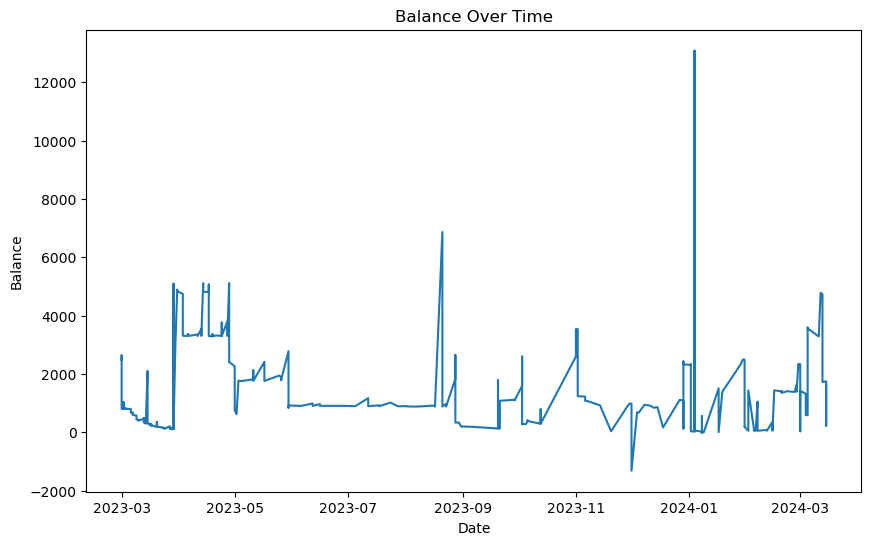

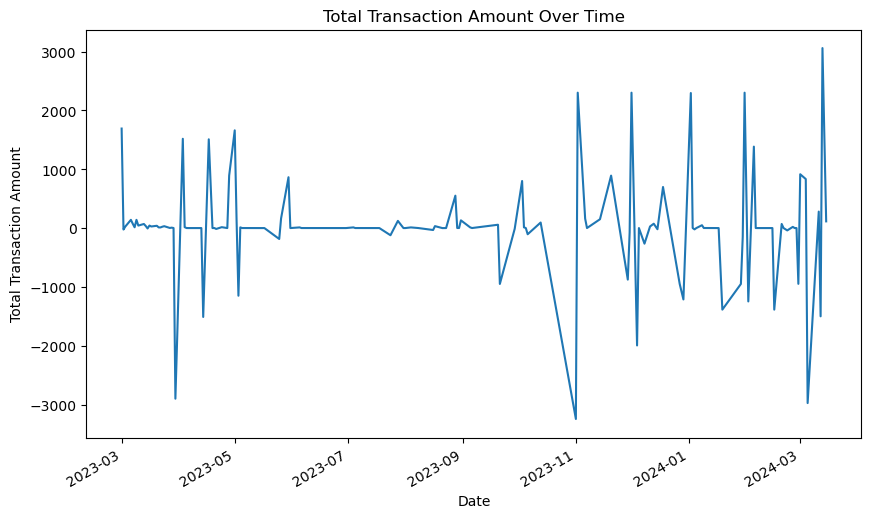

In [27]:
# Trends Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Balance'])
plt.title('Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.show()

plt.figure(figsize=(10, 6))
df.groupby('Date')['Amount'].sum().plot(kind='line')
plt.title('Total Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.savefig('total_transaction_amount_over_time.png') 
plt.show()

Transaction Type
Debit     220
Credit    106
Name: count, dtype: int64


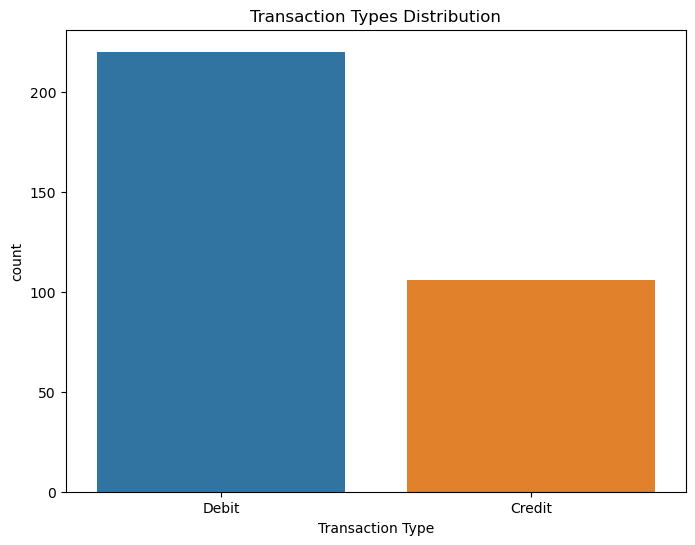

In [20]:
# Transaction Types
transaction_types_count = df['Transaction Type'].value_counts()
print(transaction_types_count)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Transaction Type')
plt.title('Transaction Types Distribution')
plt.show()

Category
Shopping & Miscellanous    112
Account Interest            41
Account Transfers           39
Interac Sent                39
Interac Received            28
Subcriptions                16
Transportation               9
Rent                         9
Coffee                       7
Grocery                      6
Sephora                      5
SoS Pay                      5
GT Pay                       4
Bank Transfer                3
Grocery Hold Rev             2
Amazon                       1
Name: count, dtype: int64


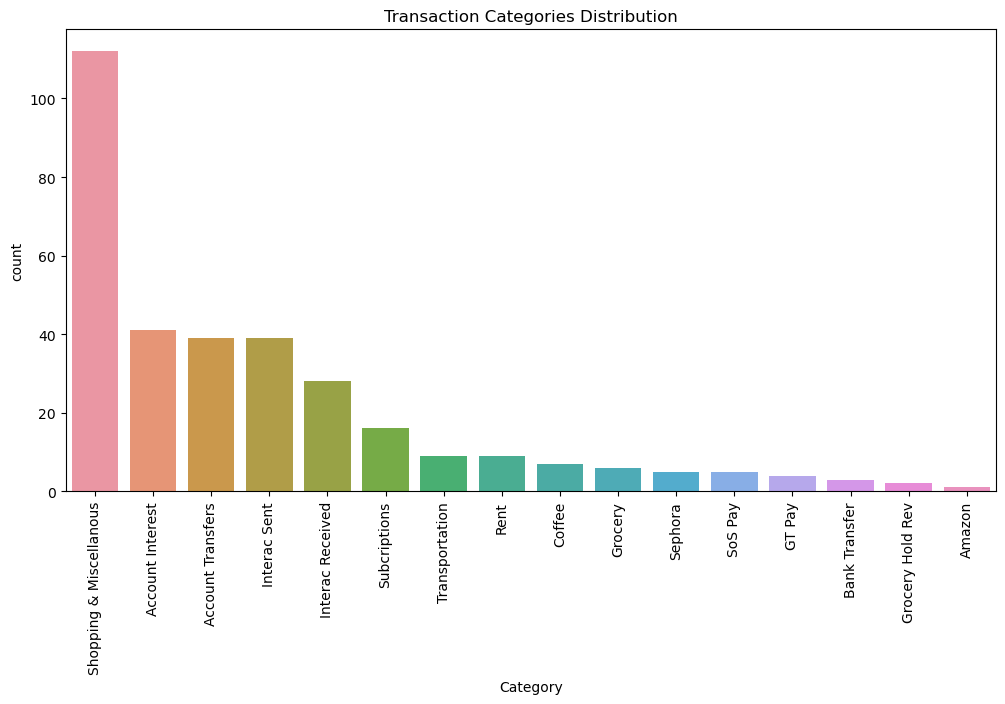

In [21]:
# Categories Analysis
categories_count = df['Category'].value_counts()
print(categories_count)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Transaction Categories Distribution')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Correlation Analysis:
# Check for correlations between numerical variables like 'Amount' and 'Balance'.
correlation_matrix = df[['Amount', 'Balance']].corr()
print(correlation_matrix)


           Amount   Balance
Amount   1.000000 -0.407046
Balance -0.407046  1.000000


In [23]:
# dashboard = pn.Column(
#     pn.Row(summary_stats, missing_values),
#     pn.Row(amount_distribution, balance_over_time),
#     pn.Row(transaction_type_count, category_spending)
# )

# dashboard

In [24]:
# Calculate daily total transactions
daily_total = df.groupby('Date')['Amount'].sum()

# Calculate monthly total transactions
monthly_total = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

# Calculate category-wise monthly total transactions
category_monthly_total = df.groupby([df['Date'].dt.to_period('M'), 'Category'])['Amount'].sum().unstack()

# Dashboard Components
daily_total_plot = daily_total.hvplot.line(title='Daily Total Transactions', xlabel='Date', ylabel='Amount', height=300)
monthly_total_plot = monthly_total.hvplot.bar(title='Monthly Total Transactions', xlabel='Month', ylabel='Amount', height=300)
category_monthly_total_plot = category_monthly_total.hvplot.bar(
    title='Category-wise Monthly Total Transactions',
    xlabel='Month',
    ylabel='Amount',
    stacked=True,
    height=400,
    legend='top_left'
)

# Summary Statistics
summary_stats = pn.pane.DataFrame(df.describe(), width=500)

# Missing Values Summary
missing_values_summary = pn.pane.Str('Missing Values Summary:\n{}'.format(df.isnull().sum()))

# Dashboard Layout
dashboard = pn.Column(
    pn.Row(daily_total_plot, monthly_total_plot),
    category_monthly_total_plot,
    summary_stats,
    missing_values_summary
)

# Show the dashboard
dashboard.servable()


Column
    [0] Row
        [0] HoloViews(Curve, height=300, sizing_mode='fixed', width=700)
        [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=700)
    [1] HoloViews(Bars, height=400, sizing_mode='fixed', width=700)
    [2] DataFrame(DataFrame, width=500)
    [3] Str(str)

In [25]:
pn.extension('plotly')
import plotly.express as px


# Additional EDA
# 1. Transaction types distribution
transaction_type_counts = df['Transaction Type'].value_counts()

# 2. Category-wise expenses summary
category_expenses = df.groupby('Category')['Amount'].sum().reset_index()

# Dashboard
title = "Personal Finances Summary"

# Sidebar content
sidebar_content = [
    pn.pane.Markdown("## Personal Finances Summary"),
    pn.pane.Markdown("### Transaction Types Distribution"),
    pn.pane.DataFrame(transaction_type_counts),
    pn.pane.Markdown("### Category-wise Expenses Summary"),
    pn.pane.DataFrame(category_expenses),
]

# Main content
main_content = [
    pn.Row(
        pn.Column(
            pn.pane.Markdown("### Balance Over Time"),
            pn.pane.Plotly(
                px.line(df, x='Date', y='Balance', title='Balance Over Time')
            ),
        ),
        pn.Column(
            pn.pane.Markdown("### Histogram of Transaction Amounts"),
            pn.pane.Plotly(
                px.histogram(df, x='Amount', title='Histogram of Transaction Amounts')
            ),
        ),
    ),
]

# Create the dashboard
dashboard = pn.template.FastListTemplate(
    title=title,
    sidebar=sidebar_content,
    main=main_content
)

# Show the dashboard
dashboard.show()


Launching server at http://localhost:55480


In [26]:

from bokeh.models import NumeralTickFormatter


# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.strftime('%Y-%m')

# Calculate total expenses per month
monthly_expenses = df[df['Transaction Type'] == 'Debit'].groupby('Month')['Amount'].sum().reset_index()

# Calculate total income per month
monthly_income = df[df['Transaction Type'] == 'Credit'].groupby('Month')['Amount'].sum().reset_index()

# Calculate balance at the end of each month
monthly_balance = df.groupby('Month')['Balance'].last().reset_index()

# Create widgets for the dashboard
income_widget = pn.widgets.DataFrame(monthly_income, name='Monthly Income')
expenses_widget = pn.widgets.DataFrame(monthly_expenses, name='Monthly Expenses')
balance_widget = pn.widgets.DataFrame(monthly_balance, name='Monthly Balance')

# Create charts for the dashboard
last_month_expenses_chart = monthly_expenses.hvplot.bar(x='Month', y='Amount', title='Last Month Expenses', xlabel='Month', ylabel='Expenses', rot=45, width=600, height=300)
balance_trend_chart = monthly_balance.hvplot.line(x='Month', y='Balance', title='Balance Trend', xlabel='Month', ylabel='Balance', width=600, height=300).opts(yformatter=NumeralTickFormatter(format='$0,0'))

# Create summary table for the dashboard
summary_data = {'Total Income': monthly_income['Amount'].sum(), 'Total Expenses': monthly_expenses['Amount'].sum(), 'Total Balance': monthly_balance['Balance'].iloc[-1]}
summary_table = pn.widgets.DataFrame(pd.DataFrame(summary_data, index=[0]), name='Summary')

# Create the dashboard template
template = pn.template.FastListTemplate(
    title="Personal Finances Summary",
    sidebar=[
        pn.pane.Markdown("## *If you can't manage your money, making more won't help*"),
        pn.pane.Markdown(""),
        pn.Column(income_widget, expenses_widget, balance_widget, width=300)
    ],
    main=[
        pn.Row(last_month_expenses_chart, balance_trend_chart),
        summary_table
    ]
)

# Show the dashboard
template.show()


/var/folders/qn/c9g3grcx2b19q3qhw5tsm1tm0000gn/T/ipykernel_22525/3307974741.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Launching server at http://localhost:55483
